In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

### Data Read

In [2]:
# dev_df = pd.read_csv('./File/B72Raw.csv', encoding='CP949')

#dev_df = pd.read_csv('./File/B72Raw.csv', encoding='CP949')

dev_df = pd.read_csv('https://raw.githubusercontent.com/kdh1647/Bumblebee2/master/File/B72Raw.csv' , encoding='CP949')

In [3]:
dev_df

,OrderDate,SalesOrder,OrderType,SalesOffice,SPName,MaterialCode,ItemDescription,OrderQty
0,2018.01.02,1394543,OR30,DB20,동일벨트산업 주식회사,1000886,ILBAN B 72 INCH 내,60
1,2018.01.02,1394579,OR10,DB10,동일벨트(울산),1000886,ILBAN B 72 INCH 내,10
2,2018.01.02,1394611,OR10,DB20,신우기업,1000886,ILBAN B 72 INCH 내,2
3,2018.01.02,1394676,OR10,DB10,유일상사,1000886,ILBAN B 72 INCH 내,20
4,2018.01.03,1395012,OR10,DB10,동일종합상사,1000886,ILBAN B 72 INCH 내,20
...,...,...,...,...,...,...,...,...
5473,2020.08.07,60034305,RE10,DB10,동일벨트(울산),1000886,ILBAN B 72 INCH 내,-10
5474,2021.02.15,60035326,RE10,DB20,(주)조일상공,1000886,ILBAN B 72 INCH 내,-5
5475,2021.04.02,60035535,RE90,DB10,동일상공사,1000886,ILBAN B 72 INCH 내,-20
5476,2021.04.08,60035565,RE90,DB20,한길산업,1000886,ILBAN B 72 INCH 내,-20


In [4]:
dev_df.info()
#OrderDate 의 자료형은 object 타입으로 주단위 계산을 위해 날자 타입으로 변경

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5478 entries, 0 to 5477
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   OrderDate        5478 non-null   object
 1   SalesOrder       5478 non-null   int64 
 2   OrderType        5478 non-null   object
 3   SalesOffice      5478 non-null   object
 4   SPName           5478 non-null   object
 5   MaterialCode     5478 non-null   int64 
 6   ItemDescription  5478 non-null   object
 7   OrderQty         5478 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 342.5+ KB


In [5]:
dev_df['OrderQty'] = pd.to_numeric(dev_df['OrderQty'])        #주문수량은 int

dev_df['SalesOrder'] = dev_df['SalesOrder'].astype(str)       #오더번호는 string

dev_df['MaterialCode'] = dev_df['MaterialCode'].astype(str)   #오더번호는 string

In [6]:
#PODATE 를 날자로 인식 할 수 있도록 '.' -> '-' https://acdongpgm.tistory.com/166
dev_df['OrderDate'] = dev_df['OrderDate'].str.replace(pat='.', repl='-', regex=True)

In [7]:
dev_df['OrderDate'] = pd.to_datetime(dev_df['OrderDate'], format='%Y-%m-%d %H:%M:%S', errors='raise')  #날자형식 변경

In [17]:
## 주수표기 https://durian9s-coding-tree.tistory.com/8
# dev_df['WEEK'] = dev_df['OrderDate'].dt.year.astype(str) + dev_df['OrderDate'].dt.isocalendar().week.astype(str)
dev_df['WEEK'] = dev_df['OrderDate'].dt.isocalendar().week.astype(str)
dev_df['WEEK'] = dev_df['WEEK'].zfill(2)

In [20]:
dev_df['WEEK'] = dev_df['WEEK'].str.zfill(2)    #예) 202201

In [25]:
dev_df['YYYYWEEK'] =  dev_df['OrderDate'].dt.year.astype(str) + dev_df['WEEK']

In [24]:
dev_df

,OrderDate,SalesOrder,OrderType,SalesOffice,SPName,MaterialCode,ItemDescription,OrderQty,YYYYWEEK,WEEK
0,2018-01-02,1394543,OR30,DB20,동일벨트산업 주식회사,1000886,ILBAN B 72 INCH 내,60,201801,01
1,2018-01-02,1394579,OR10,DB10,동일벨트(울산),1000886,ILBAN B 72 INCH 내,10,201801,01
2,2018-01-02,1394611,OR10,DB20,신우기업,1000886,ILBAN B 72 INCH 내,2,201801,01
3,2018-01-02,1394676,OR10,DB10,유일상사,1000886,ILBAN B 72 INCH 내,20,201801,01
4,2018-01-03,1395012,OR10,DB10,동일종합상사,1000886,ILBAN B 72 INCH 내,20,201801,01
...,...,...,...,...,...,...,...,...,...,...
5473,2020-08-07,60034305,RE10,DB10,동일벨트(울산),1000886,ILBAN B 72 INCH 내,-10,202032,32
5474,2021-02-15,60035326,RE10,DB20,(주)조일상공,1000886,ILBAN B 72 INCH 내,-5,202107,07
5475,2021-04-02,60035535,RE90,DB10,동일상공사,1000886,ILBAN B 72 INCH 내,-20,202113,13
5476,2021-04-08,60035565,RE90,DB20,한길산업,1000886,ILBAN B 72 INCH 내,-20,202114,14


In [26]:
grp_df = dev_df.groupby(['OrderDate', 'YYYYWEEK']).sum()

In [27]:
grp_df = grp_df.reset_index()    #groupby 이 후 인덱스 생성

grp_df

,OrderDate,YYYYWEEK,OrderQty
0,2018-01-02,201801,92
1,2018-01-03,201801,130
2,2018-01-04,201801,45
3,2018-01-05,201801,54
4,2018-01-08,201802,464
...,...,...,...
1248,2022-09-26,202239,83
1249,2022-09-27,202239,45
1250,2022-09-28,202239,20
1251,2022-09-29,202239,80


In [28]:
grp_df.describe()

,OrderQty
count,1253.000000
mean,111.264166
std,219.238097
min,-440.000000
25%,41.000000
50%,78.000000
75%,126.000000
max,6563.000000


In [29]:
grp_df.query("OrderQty < 0 or OrderQty > 2000 ")

,OrderDate,YYYYWEEK,OrderQty
71,2018-04-11,201815,-10
501,2019-11-22,201947,-440
968,2021-08-12,202132,6563


In [30]:
#outlier 제거 0보다 작거나, 2000보다 큰 주문
grp_df.drop(71, inplace=True)
grp_df.drop(501, inplace=True)
#grp_df.drop(875, inplace=True)
grp_df.drop(968, inplace=True)

In [31]:
grp_df.query("OrderQty < 0 or OrderQty > 2000 ")

,OrderDate,YYYYWEEK,OrderQty


In [32]:
## 이동평균 구하기 1주일, 2주일 > https://amatoroi.tistory.com/m/23
grp_df['7MA'] = grp_df['OrderQty'].rolling(window=7).mean()

grp_df['14MA'] = grp_df['OrderQty'].rolling(window=14).mean()

In [33]:
grp_df

,OrderDate,YYYYWEEK,OrderQty,7MA,14MA
0,2018-01-02,201801,92,NaN,NaN
1,2018-01-03,201801,130,NaN,NaN
2,2018-01-04,201801,45,NaN,NaN
3,2018-01-05,201801,54,NaN,NaN
4,2018-01-08,201802,464,NaN,NaN
...,...,...,...,...,...
1248,2022-09-26,202239,83,111.285714,92.071429
1249,2022-09-27,202239,45,112.000000,90.285714
1250,2022-09-28,202239,20,96.857143,89.928571
1251,2022-09-29,202239,80,93.571429,92.785714


In [34]:
grp_df.to_csv('./B72_7MA_14MA.csv', index=False)

In [35]:
b72_df = pd.read_csv('./B72_7MA_14MA.csv')

In [36]:
b72_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OrderDate  1250 non-null   object 
 1   YYYYWEEK   1250 non-null   int64  
 2   OrderQty   1250 non-null   int64  
 3   7MA        1244 non-null   float64
 4   14MA       1237 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 49.0+ KB


In [37]:
b72_df['OrderDate'] = pd.to_datetime(b72_df['OrderDate'], format='%Y-%m-%d %H:%M:%S', errors='raise') 

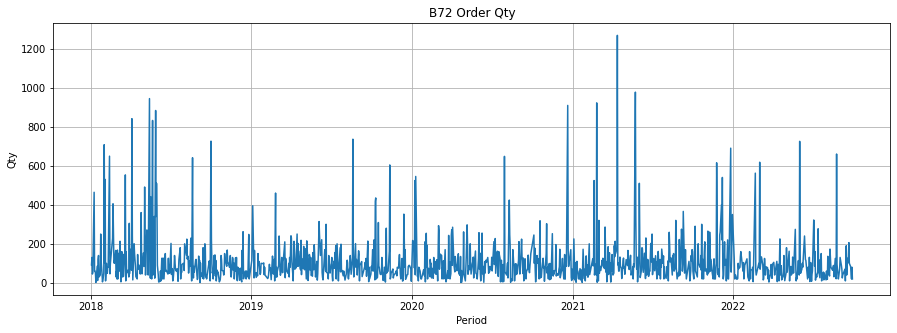

In [38]:
plt.figure(figsize=(15, 5)) 

plt.title('B72 Order Qty')
plt.ylabel('Qty')
plt.xlabel('Period')
plt.grid()

plt.plot(grp_df['OrderDate'], grp_df['OrderQty'], label='OrderQty')
plt.show()

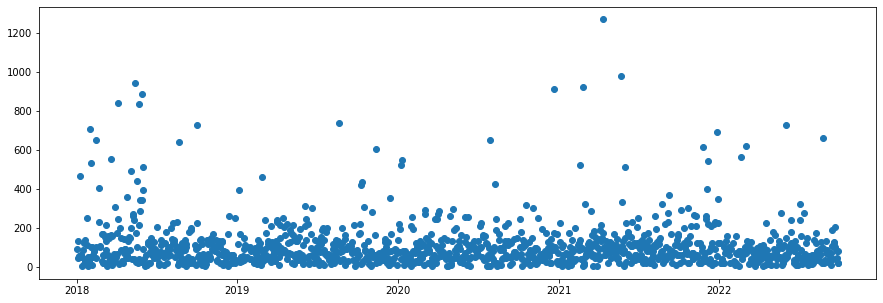

In [28]:
plt.figure(figsize=(15, 5)) 
plt.scatter(b72_df['OrderDate'],b72_df['OrderQty'])
plt.show()